<a href="https://colab.research.google.com/github/Samuel-Njoroge/Exploratory_Data_Analysis_on_Gala_Store_Sales/blob/main/Exploratary_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COGNIZANT VIRTUAL WORK EXPERIENCE.**

# **TASK 1**

*Exploratory Data Analysis  on a Sales Data from Gala Groceries, a technology-led grocery store chain based in the USA.*

#**EXPLORATORY DATA ANALYSIS.  (EDA)** 


Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.





# *Section 1. Setup.*

In [125]:
#Mounting drive 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [126]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# *Section 2. Data Loading*

In [127]:
#Loading the dataset.
file_path = '/content/drive/MyDrive/Cognizant/EDA/sample_sales_data.csv'
sales_data = pd.read_csv(file_path)
sales_data.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

#Top 5 rows of the sales data
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [128]:
#Last 5 rows of the sales data
sales_data.tail()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash
7828,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13:50:36,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card


# *Section 3. Descriptive Statistics*

transaction_id = A unique ID that is assigned to each transaction

timestamp = The datetime at which the transaction was made

product_id = An ID that is assigned to the product that was sold. Each product has a unique ID

category = The category that the product is contained within

customer_type = The type of customer that made the transaction

unit_price = The price that 1 unit of this item sells for

quantity = The number of units sold for this product within this 
transaction

total = The total amount payable by the customer

payment_type = The payment method used by the customer

In [129]:
#Summary information
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


Descriptive Statistics

In [130]:
#Descriptive statistics
sales_data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


# *Section 4. Exploring more about the data.*

In [131]:
#Grouping the sales by categories
category_sales = sales_data.groupby('category').sum().sort_values(by='total',ascending=False)
category_sales


,unit_price,quantity,total
category,,,
kitchen,5768.58,955,14456.65
meat,5734.78,939,14102.31
seafood,4064.07,669,10754.81
medicine,4167.17,602,10393.78
beverages,3799.99,776,9930.64
cleaning products,3738.38,725,9483.75
baked goods,3375.57,1089,8348.21
dairy,2992.55,950,7551.60
refrigerated items,2941.95,1065,7436.45


In [132]:
#Grouping sales by customer_type
customer_sales = sales_data.groupby('customer_type').sum().sort_values(by='quantity',ascending=False)
customer_sales

,unit_price,quantity,total
customer_type,,,
standard,12297.85,4032,31388.78
premium,12409.40,3992,31655.68
non-member,12611.19,3976,31755.24
basic,11933.44,3794,29569.16
gold,11966.83,3791,29939.99


In [141]:
#Grouping sales by quantity
#Grouping sales by customer_type
quantity_sales = sales_data.groupby('category').sum().sort_values(by='quantity',ascending=False)
quantity_sales

,unit_price,quantity,total
category,,,
fruit,2498.62,2439,6124.21
vegetables,2003.64,2124,5070.46
packaged foods,2496.83,1280,6373.70
baked goods,3375.57,1089,8348.21
canned foods,2702.09,1082,6743.48
refrigerated items,2941.95,1065,7436.45
kitchen,5768.58,955,14456.65
dairy,2992.55,950,7551.60
meat,5734.78,939,14102.31


In [133]:
#Grouping sales by payment type.
sales_payment_type = sales_data.groupby('payment_type').sum().sort_values(by='total',ascending=False)
sales_payment_type

,unit_price,quantity,total
payment_type,,,
cash,16015.23,5169,41287.31
credit card,15628.21,4848,39309.52
debit card,14540.02,4833,37010.67
e-wallet,15035.25,4735,36701.35


In [134]:
#Grouping sales by timestamp
time_of_sales = sales_data.groupby('timestamp').sum().sort_values(by='total',ascending=False)
time_of_sales


,unit_price,quantity,total
timestamp,,,
2022-03-06 12:27:34,34.68,6,104.04
2022-03-07 11:17:42,23.99,4,95.96
2022-03-05 09:54:33,23.99,4,95.96
2022-03-02 18:58:13,23.99,4,95.96
2022-03-06 15:59:26,27.18,7,95.53
...,...,...,...
2022-03-04 09:22:08,0.19,1,0.19
2022-03-06 15:29:21,0.19,1,0.19
2022-03-03 18:55:31,0.19,1,0.19


#*Section 5. Visualization.*

In [135]:
#Subsetting the columns to be used
sales_data_subset= sales_data[['timestamp','category' ,'customer_type' ,'total','payment_type']]

Text(0.5, 1.0, 'Total Sales vs Category of Sales')

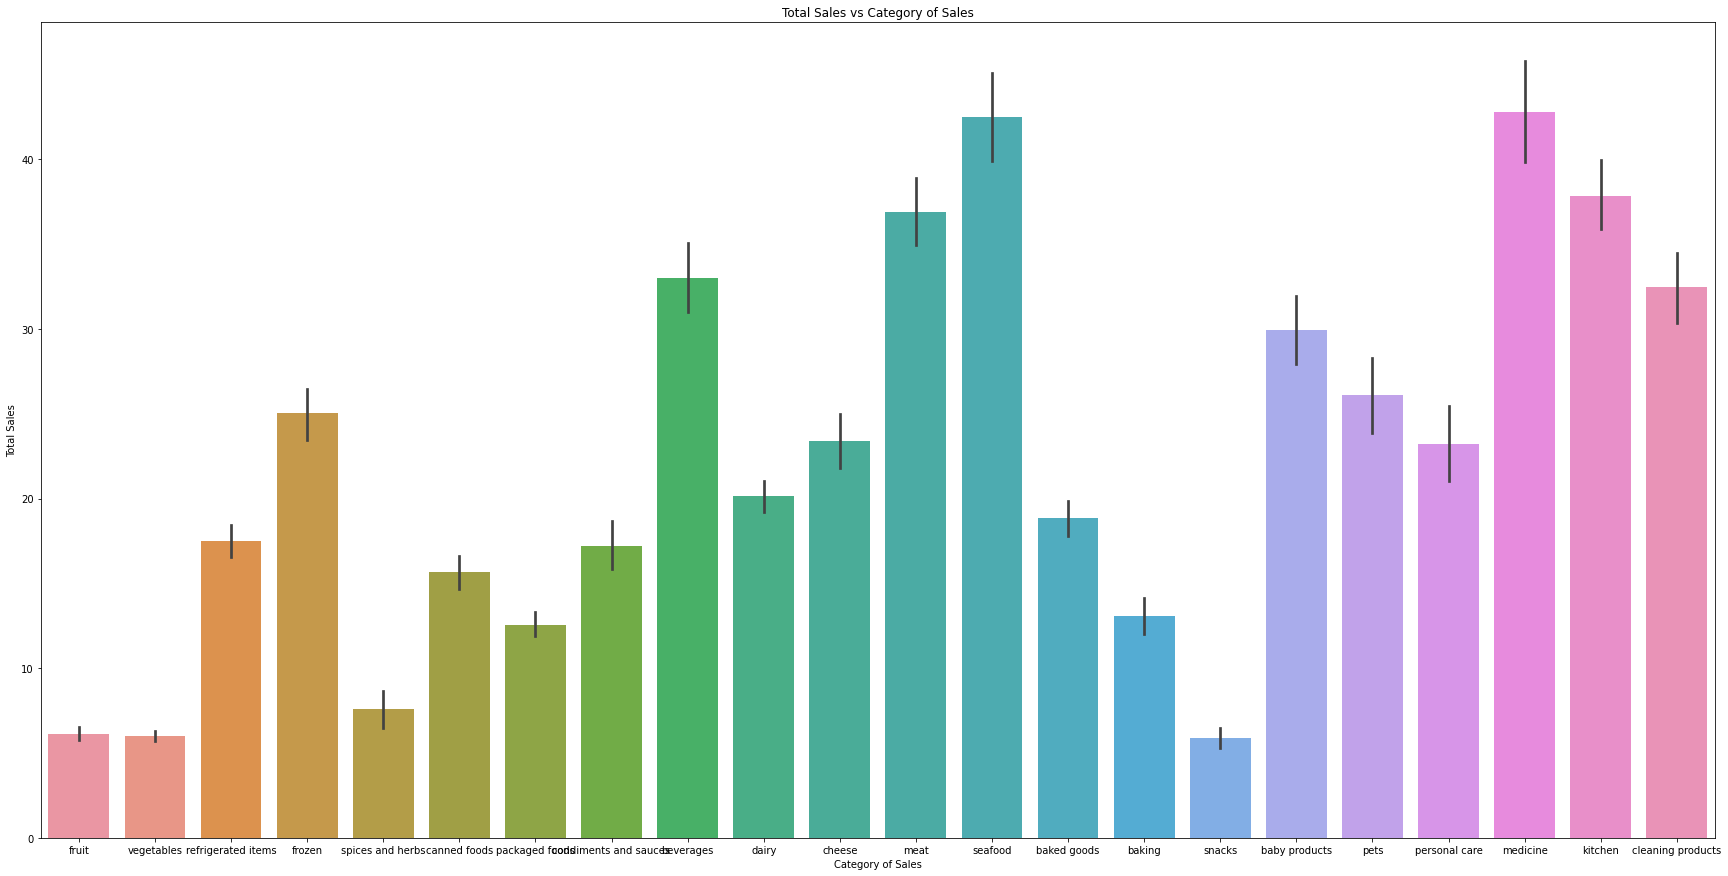

In [136]:
# Creating a figure and increasing the figure size
fig = plt.figure(figsize=(30,15))

#A bar plot of total sales against category.
sns.barplot(data =sales_data_subset,x='category' ,y='total')
plt.xlabel('Category of Sales')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Category of Sales')


Text(0.5, 1.0, 'Total sales vs Customer Type')

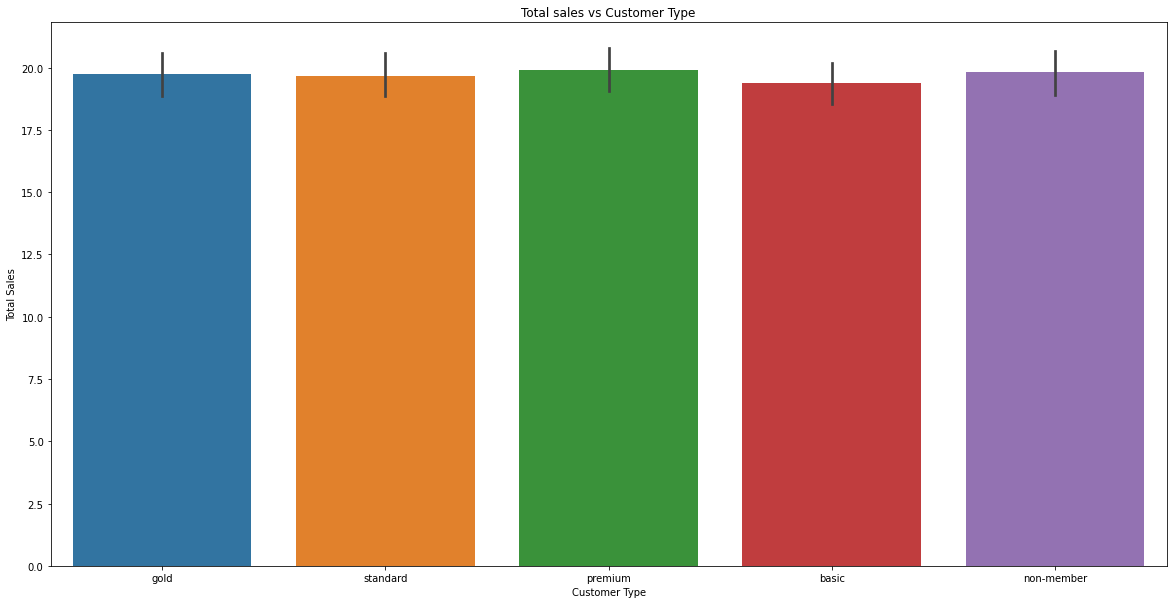

In [139]:
# Creating a figure and increasing the figure size
fig = plt.figure(figsize=(20,10))

#A bar plot of total sales against customer type.
sns.barplot(data =sales_data_subset,x='customer_type' ,y='total')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total sales vs Customer Type')


Text(0.5, 1.0, 'Total Sales vs Payment Type')

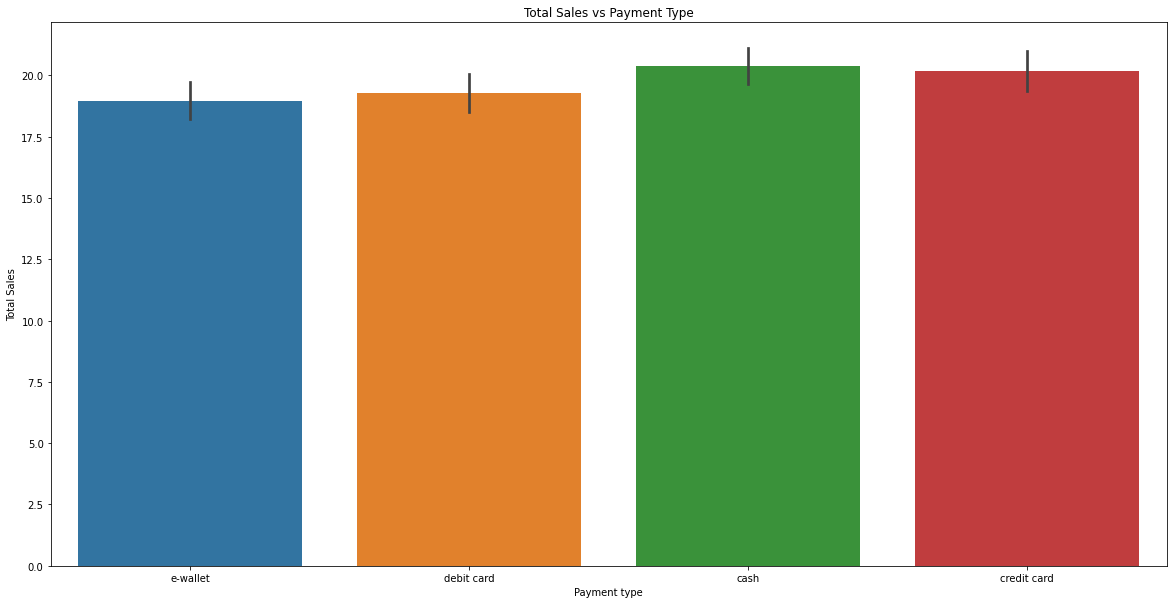

In [140]:
# Creating a figure and increasing the figure size
fig = plt.figure(figsize=(20,10))

#A bar plot of total sales against payment type.
sns.barplot(data =sales_data_subset,x='payment_type' ,y='total')
plt.xlabel('Payment type')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Payment Type')


# *Section 6. Summary*

**OBSERVATIONS**
1. The highest number of total sales were from Kitchen products. (14456.65)
2. The highest number of unit sales are by 'standard' customers  (4032)
3. The highest number of total sales were made using 'cash' (41287.31)
4. The highest number of total sales were made on 2022-03-06  at  12:27:34    -  (104.04)
5. The highest number of quantity of  units sold were fruits (2439)